In [1]:
import numpy as np
from ship import Ship
from tests import Tests
from botma import TMA
import time
from scipy import stats

In [2]:
# Класс для сохранения результатов
tests = Tests('test1')

# Создаем наблюдатель
observer_x, observer_y, observer_course, observer_velocity = 0, 0, 0, 3
observer = Ship('Наблюдатель', observer_x, observer_y, observer_course,
                observer_velocity, verbose=True)
# Создаем объект
target_bearing, target_distance, target_course, target_velocity = 0, 20, 45, 10
target = Ship('Объект', target_bearing, target_distance, target_course,
              target_velocity, observer, mode='bdcv', verbose=True)

In [3]:
# Моделирование траекторий
observer.forward_movement(3 * 60)
observer.change_course(270, 'left', omega=0.5)
observer.forward_movement(2 * 60)
observer.change_course(90, 'right', omega=0.5)
observer.forward_movement(5 * 60)

# Время движения объекта должно совпадать с временем наблюдателя для TMA
target.forward_movement(len(observer.coords[0])-1)

Наблюдатель движется прямо по курсу 0.0° 180с
Наблюдатель перешёл на курс 270.0° за 180с
Наблюдатель движется прямо по курсу 270.0° 120с
Наблюдатель перешёл на курс 90.0° за 360с
Наблюдатель движется прямо по курсу 90.0° 300с
Объект движется прямо по курсу 45.0° 1140с


In [4]:
tma = TMA(observer, target, sd=np.radians(0.5), seed=1)
tma.print_verbose()

П0 = 0, Д0 = 20 км, К = 45, V = 10 м/c
СКОп = 0.5, tau = 2
Предельно допустимые значения ошибок КПДО:
- 1градус по пеленгу,
- 15%Д по дальности,
- 10 градусов по курсу,
- 10% по скорости.


In [5]:
n = 1000
start_time = time.perf_counter()
dict_results = tma.swarm(n=n, seeded=True, fixed_target=False, fixed_noise=False, p0=[0., 20., 45., 10.])
stop_time = time.perf_counter()
print('Моделирование {} результатов закончено за t={:.1f} секунд'.format(n, stop_time-start_time))
df = tests.get_df(dict_results)
df.head().round(3)

Моделирование 1000 результатов закончено за t=24.7 секунд


,П0_ист,Д0_ист,К0_ист,V0_ист,П0_расч,Д0_расч,К0_расч,V0_расч,П0_апр,Д0_апр,...,СКО X,СКО Y,СКО VX,СКО VY,Ка,Кб,Точ,t,Nf,Iter
0,0.0,17.940,91.485,9.980,359.947,17.771,89.767,10.051,0.0,20.0,...,0.025,0.474,0.401,0.178,0.239,0.090,1.0,0.004,18.0,14.0
1,0.0,13.237,27.717,11.110,359.861,13.110,27.164,11.554,0.0,20.0,...,0.020,0.244,0.179,0.522,0.245,0.165,1.0,0.002,8.0,7.0
2,0.0,47.853,144.509,10.600,0.154,43.131,155.835,11.847,0.0,20.0,...,0.055,2.213,0.543,1.150,0.249,0.780,0.0,0.002,10.0,9.0
3,0.0,18.648,141.329,12.843,0.122,17.486,142.588,11.965,0.0,20.0,...,0.022,0.559,0.352,0.280,0.261,0.337,1.0,0.005,26.0,20.0
4,0.0,19.052,139.603,8.329,359.970,18.642,140.398,8.178,0.0,20.0,...,0.025,0.452,0.251,0.112,0.232,0.109,1.0,0.003,11.0,10.0


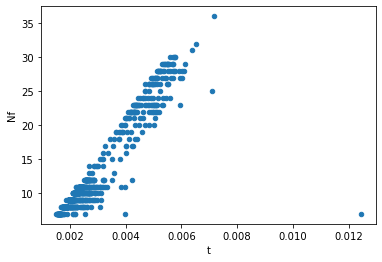

In [6]:
df.plot.scatter(x='t', y='Nf');

In [7]:
res = stats.spearmanr(df['t'], df['Nf'])
print('stat = {}, p-value = {}'.format(*res))

stat = 0.9094327314749213, p-value = 0.0


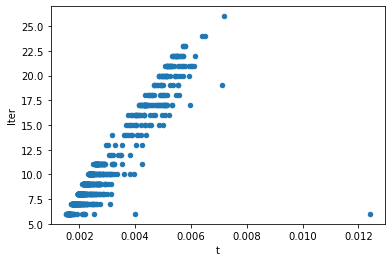

In [8]:
df.plot.scatter(x='t', y='Iter');

In [9]:
res = stats.spearmanr(df['t'], df['Iter'])
print('stat = {}, p-value = {}'.format(*res))

stat = 0.9104753049143787, p-value = 0.0
